In [ ]:
# Reuters newswire topics classification

## Step 0: Importing Libraries

In [44]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Step 1: Importing Data

In [45]:
ret = keras.datasets.reuters

In [46]:
(X_train, y_train), (X_test, y_test) = ret.load_data(num_words=5000)

In [47]:
X_train.shape,X_test.shape

((8982,), (2246,))

In [48]:
np.unique(y_train) #for checking the unique labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [49]:
print("Number of words: ")
print(len(np.unique(np.hstack(X_train))))

Number of words: 
4998


## Step 2: Data Preprocessing

### Step 2.1: Data Visualization

Mean is 145.5398574927633


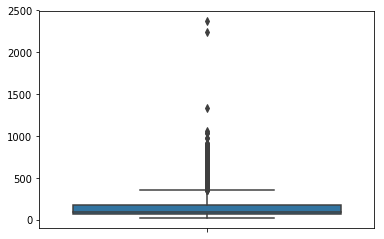

In [50]:
# Visualizing the Dataset

result = [len(x) for x in X_train]
sns.boxplot(y=result)
print("Mean is", np.mean(result))

In [51]:
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


## Data is already preprocessed i.e. the words are already converted into numbers.

### Step 2.2 Visualizing the Actual Review from preprocessed dataset

In [52]:
word_index = ret.get_word_index()
reverse_word_index = {y:x for x,y in word_index.items()}

In [53]:
def decode_review(encoded_review):
    decoded_review = []
    for word in encoded_review:
        #print(word)
        if word in reverse_word_index:
            decoded_review.append(reverse_word_index[word])
    return decoded_review

In [54]:
print(decode_review(X_train[0]))

['the', 'of', 'of', 'mln', 'loss', 'for', 'plc', 'said', 'at', 'only', 'ended', 'said', 'commonwealth', 'could', '1', 'traders', 'now', 'april', '0', 'a', 'after', 'said', 'from', '1985', 'and', 'from', 'foreign', '000', 'april', '0', 'prices', 'its', 'account', 'year', 'a', 'but', 'in', 'this', 'mln', 'home', 'an', 'states', 'earlier', 'and', 'rise', 'and', 'revs', 'vs', '000', 'its', '16', 'vs', '000', 'a', 'but', '3', 'psbr', 'oils', 'several', 'and', 'shareholders', 'and', 'dividend', 'vs', '000', 'its', 'all', '4', 'vs', '000', '1', 'mln', 'agreed', 'largely', 'april', '0', 'are', '2', 'states', 'will', 'billion', 'total', 'and', 'against', '000', 'pct', 'dlrs']


In [55]:
word_index = {x:(y+3) for x,y in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
reverse_word_index = {y:x for x,y in word_index.items()}

In [56]:
print(' '.join(decode_review(X_train[0])))
print('----')
print(' '.join(decode_review(X_train[3])))

<START> <UNK> <UNK> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
----
<START> the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely <UNK> borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian <UNK> senior associate director of gao also said that a preliminary analysis of proposed changes in <UNK> financial <UNK> standards indicated as many as one half of <UNK> borrowers who received new loans from the agency in 1986 would be <UNK> unde

### Step 2.3 Padding all Reviews to have equal length

In [57]:
from tensorflow.python.keras.preprocessing import sequence

In [58]:
max_review_length = 500
X_train_padded = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test_padded = sequence.pad_sequences(X_test, maxlen=max_review_length)


Mean is 500.0


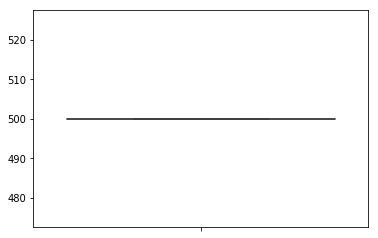

In [59]:
result = [len(x) for x in X_train_padded]
sns.boxplot(y=result)
print("Mean is", np.mean(result))

In [60]:
print(X_train_padded[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

## Step 3: One Hot Encoding (optional)

In [61]:
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [62]:
tokenizer = Tokenizer(num_words=5000)
token_X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
token_X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')
print(token_X_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [63]:
token_X_train.shape, token_X_test.shape

((8982, 5000), (2246, 5000))

## Step 4: Modelling Data

In [64]:
from tensorflow.python.keras.datasets import imdb
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM, SimpleRNN, Dropout, Flatten
from tensorflow.python.keras.layers import Embedding
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.optimizers import Adam

In [91]:
embedding_vector_length = 512

model = Sequential()

model.add(Embedding(5000, embedding_vector_length, input_length=max_review_length))

model.add(LSTM(100, return_sequences= True))


model.add(keras.layers.GlobalAveragePooling1D())

model.add(Flatten())

model.add(Dense(512, activation='relu'))



model.add(Dropout(0.2))


model.add(Dense(46, activation='softmax'))

In [92]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [94]:
model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.1)

c:\users\kanwal\miniconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
c:\users\kanwal\miniconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 430s 53ms/step - loss: 2.1932 - acc: 0.3886 - val_loss: 1.8320 - val_acc: 0.4939
Epoch 2/10
8083/8083 [==============================] - 426s 53ms/step - loss: 1.5741 - acc: 0.6071 - val_loss: 1.4855 - val_acc: 0.6418
Epoch 3/10
8083/8083 [==============================] - 420s 52ms/step - loss: 1.2970 - acc: 0.6693 - val_loss: 1.3659 - val_acc: 0.6819
Epoch 4/10
8083/8083 [==============================] - 422s 52ms/step - loss: 1.0978 - acc: 0.7164 - val_loss: 1.2670 - val_acc: 0.7041
Epoch 5/10
8083/8083 [==============================] - 421s 52ms/step - loss: 0.9255 - acc: 0.7605 - val_loss: 1.2474 - val_acc: 0.7119
Epoch 6/10
8083/8083 [==============================] - 423s 52ms/step - loss: 0.7908 - acc: 0.7948 - val_loss: 1.2283 - val_acc: 0.7241
Epoch 7/10
8083/8083 [==============================] - 422s 52ms/step - loss: 0.6843 - acc: 0.8258 - val_loss: 1.1843 - val_acc: 0

In [95]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 512)          2560000   
_________________________________________________________________
lstm_7 (LSTM)                (None, 500, 100)          245200    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 100)               0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               51712     
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 46)                23598     
Total para

## Step 5: Saving Model

In [96]:
model.save_weights('sentiment_v1.h5')

## Step 6: Visualizing the Losses and Accuracy

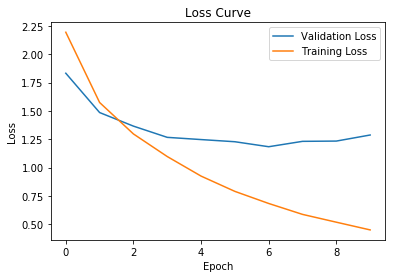

In [97]:
val_loss = model.history.history['val_loss']
tra_loss = model.history.history['loss']

plt.plot(val_loss)
plt.plot(tra_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(['Validation Loss', 'Training Loss'])
plt.show()

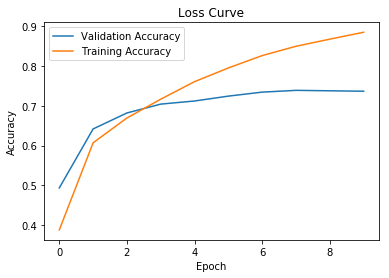

In [98]:
val_acc = model.history.history['val_acc']
tra_acc = model.history.history['acc']

plt.plot(val_acc)
plt.plot(tra_acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Loss Curve')
plt.legend(['Validation Accuracy', 'Training Accuracy'])
plt.show()

## Step 7: Testing Your Neural Network

In [99]:
scores = model.evaluate(X_test_padded, y_test, verbose=0)
print("Test Accuracy: " , (scores[1]*100))

Test Accuracy:  75.4674977685125
